In [61]:
import numpy as np
import pandas as pd
import os
import re
import warnings
import math

In [62]:
df=pd.read_csv("https://raw.githubusercontent.com/kunaltibe7/datascienceengmethods/main/Capstone%20Project/healthcare-stroke-dataset.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [63]:
df.shape

(5110, 12)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [65]:
df.dropna(subset=['bmi'], inplace=True)

In [66]:
# Get the count of each unique value in the 'gender' column
gender_counts = df['gender'].value_counts()

# Print the unique genders and their counts
print("Gender Counts:")
print(gender_counts)

Gender Counts:
gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64


In [67]:
# Drop rows where the 'gender' column contains the value 'other'
df = df[df['gender'] != 'Other']

# Get the unique values in the 'gender' column
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [68]:
# Round up the values in the 'age' column to the nearest integer
df['age'] = df['age'].apply(lambda x: math.ceil(x))

# Find the maximum and minimum age
max_age = df['age'].max()
min_age = df['age'].min()

print("Maximum Age:", max_age)
print("Minimum Age:", min_age)

Maximum Age: 82
Minimum Age: 1


In [69]:
# Get the count of each unique value in the 'smoking_status' column
smoking_status_counts = df['smoking_status'].value_counts()

# Print the unique smoking_status and their counts
print("Smoking Status Counts:")
print(smoking_status_counts)

Smoking Status Counts:
smoking_status
never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: count, dtype: int64


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Split the data into features (X) and target (y)
X = df.drop(columns=['smoking_status'])
y = df['smoking_status']

# Encode categorical variables
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

# Split the data into training and test sets
X_train, X_test = X_encoded[y != 'Unknown'], X_encoded[y == 'Unknown']
y_train = y[y != 'Unknown']

# Train a machine learning model (Random Forest classifier, for example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the missing values
predicted_values = model.predict(X_test)

# Impute the missing values in the original DataFrame
df.loc[df['smoking_status'] == 'Unknown', 'smoking_status'] = predicted_values

# Get the count of each unique value in the 'smoking_status' column
smoking_status_counts = df['smoking_status'].value_counts()

# Print the unique smoking_status and their counts
print("Smoking Status Counts:")
print(smoking_status_counts)

Smoking Status Counts:
smoking_status
never smoked       3162
formerly smoked     976
smokes              770
Name: count, dtype: int64


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   object 
 2   age                4908 non-null   int64  
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   object 
 6   work_type          4908 non-null   object 
 7   Residence_type     4908 non-null   object 
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   object 
 11  stroke             4908 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 498.5+ KB


In [72]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,37060.423594,42.879788,0.091891,0.049511,105.297402,28.89456,0.042584
std,20995.468407,22.535885,0.288901,0.216954,44.425550,7.85432,0.201937
min,77.000000,1.000000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,18602.500000,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,37580.500000,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,55181.750000,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [73]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [74]:
# Specify the file path where you want to save the CSV file
file_path = 'healthcare-stroke-dataset_cleaned.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print("DataFrame saved successfully to:", file_path)


DataFrame saved successfully to: healthcare-stroke-dataset_cleaned.csv


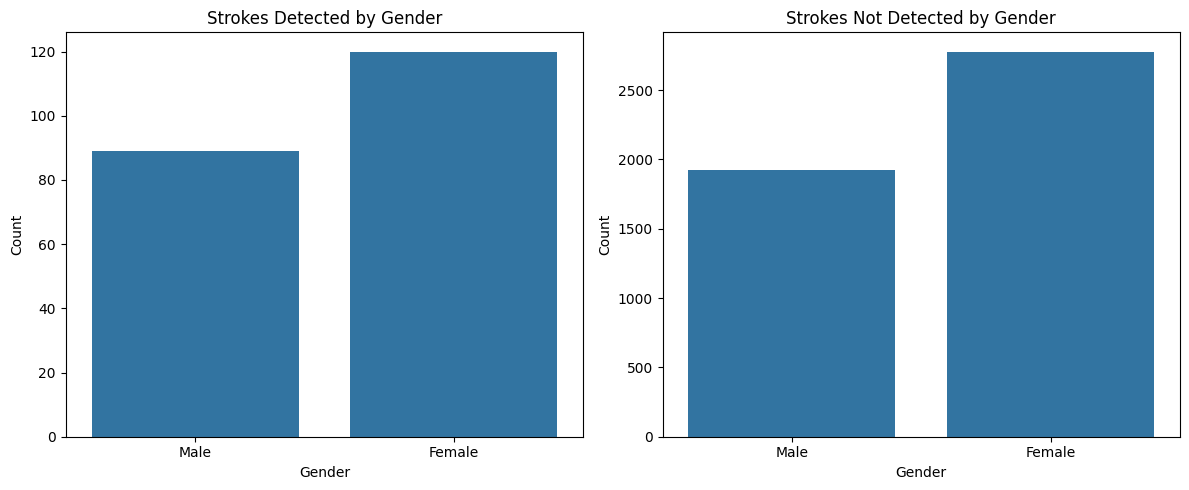

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for stroke detected and not detected separately
stroke_detected = df[df['stroke'] == 1]
stroke_not_detected = df[df['stroke'] == 0]

# Plot two count plots side by side
plt.figure(figsize=(12, 5))

# Plot for strokes detected
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=stroke_detected)
plt.title('Strokes Detected by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot for strokes not detected
plt.subplot(1, 2, 2)
sns.countplot(x='gender', data=stroke_not_detected)
plt.title('Strokes Not Detected by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [77]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [81]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

# Separate features (X) and target (y)
X = df.drop(columns=['stroke'])
y = df['stroke']

# Encode categorical variables
label_encoder = LabelEncoder()
X_encoded = X.copy()
for col in X.columns:
    if X[col].dtype == 'object':
        X_encoded[col] = label_encoder.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Evaluate the model
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.945010183299389


In [82]:
# Save the trained model to a .sav file using pickle
model_file = 'stroke_rf_model.pkl'
with open(model_file, 'wb') as f:
    pickle.dump(rf_classifier, f)
print("Model saved successfully as:", model_file)

Model saved successfully as: stroke_rf_model.pkl
